Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

In [65]:
train = pd.read_csv(r'C:\Users\horta\Desktop\trainpruebatecnica.csv')

In [66]:
train.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [67]:
train.target.unique()

array([0, 1], dtype=int64)

In [25]:
train.describe()


,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,...,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.0
mean,5190.619452,0.063209,13.803455,0.048483,1.159989,0.041848,1.113642,0.147857,0.780721,0.762143,...,0.103871,9.871199,1.179333,0.005270,9.842717,2.345083,0.049895,0.099672,0.045301,0.0
std,1803.621067,0.059676,8.915071,0.032962,1.023892,0.032650,2.015693,0.216435,0.655787,0.434479,...,0.056192,5.582563,0.599789,0.002945,14.346680,2.142725,0.028903,0.115973,0.026969,0.0
min,34.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4049.000000,0.030000,5.800000,0.020000,0.390000,0.010000,0.060000,0.030000,0.090000,0.400000,...,0.057000,4.980000,0.700000,0.003000,1.120000,0.590000,0.030000,0.030000,0.020000,0.0
50%,5417.000000,0.060000,13.590000,0.040000,0.810000,0.040000,0.180000,0.060000,0.710000,0.750000,...,0.105000,10.040000,1.270000,0.006000,3.750000,1.600000,0.050000,0.060000,0.050000,0.0
75%,6679.000000,0.080000,21.680000,0.070000,1.760000,0.070000,0.560000,0.100000,1.380000,1.150000,...,0.153000,14.720000,1.670000,0.008000,9.710000,3.710000,0.070000,0.090000,0.070000,0.0
max,7987.000000,0.610000,29.840000,0.200000,4.890000,0.130000,8.520000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.750000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,0.0


In [26]:
train.isnull().sum()


ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

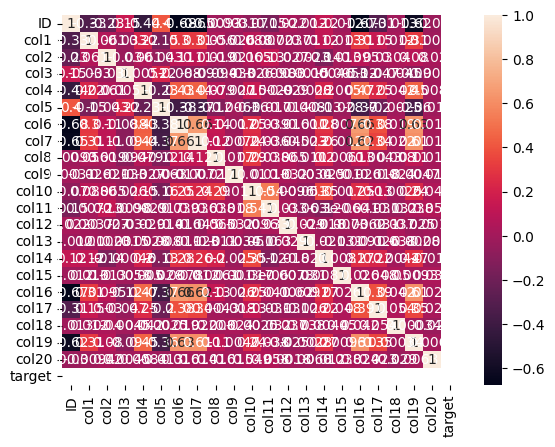

In [27]:
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()


In [28]:
correlation_matrix = train.corr()
correlation_with_target = correlation_matrix["target"].sort_values(ascending=False) 
print(correlation_with_target)


ID       NaN
col1     NaN
col2     NaN
col3     NaN
col4     NaN
col5     NaN
col6     NaN
col7     NaN
col8     NaN
col9     NaN
col10    NaN
col11    NaN
col12    NaN
col13    NaN
col14    NaN
col15    NaN
col16    NaN
col17    NaN
col18    NaN
col19    NaN
col20    NaN
target   NaN
Name: target, dtype: float64


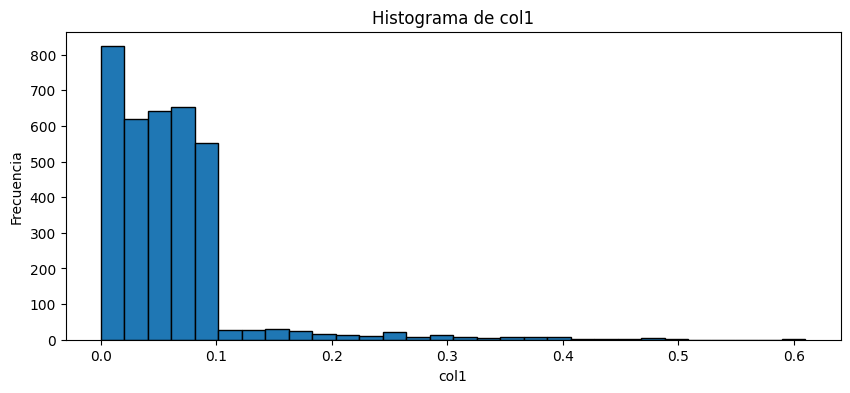

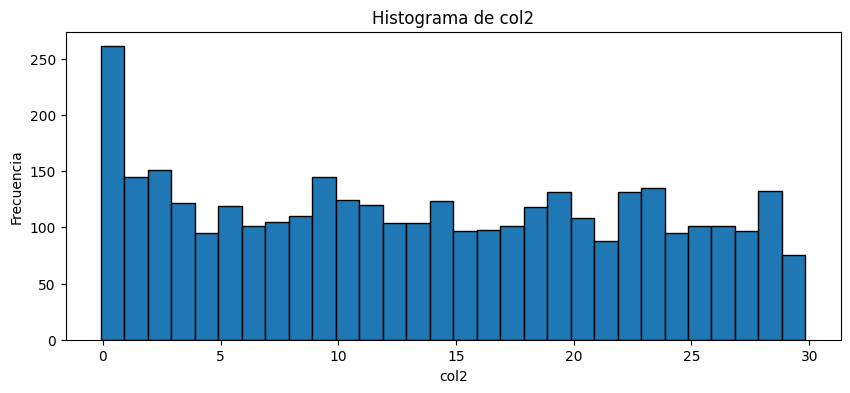

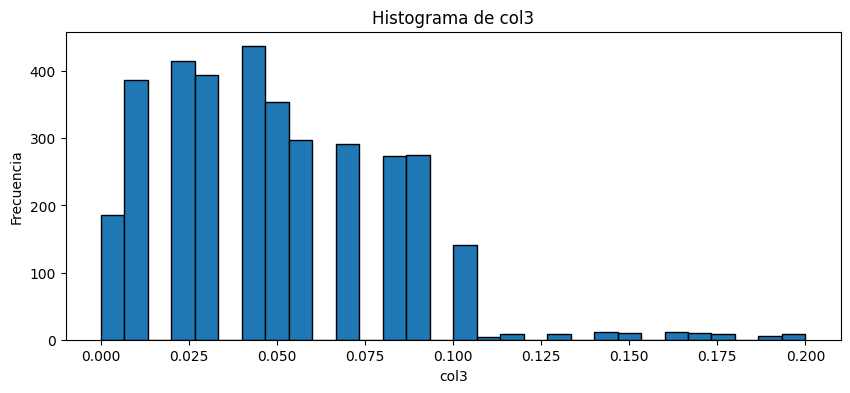

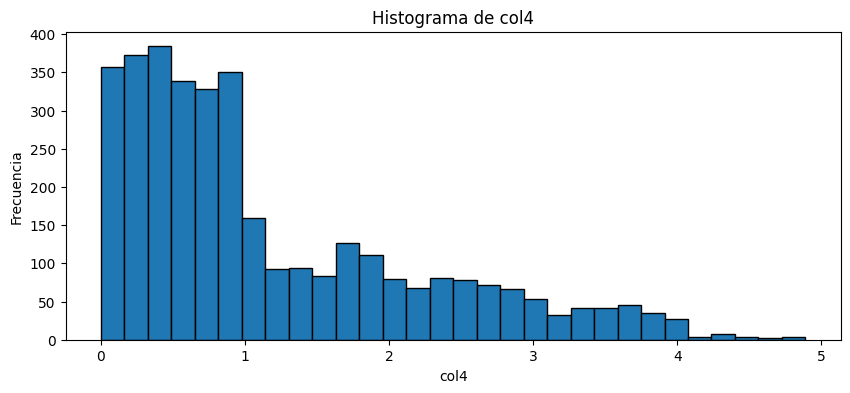

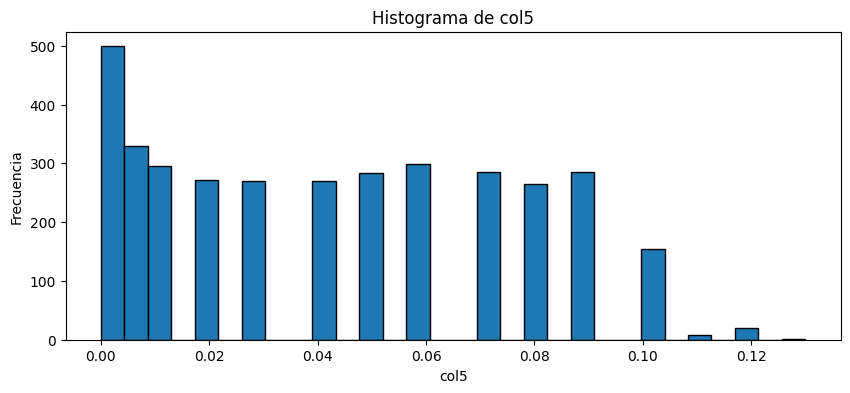

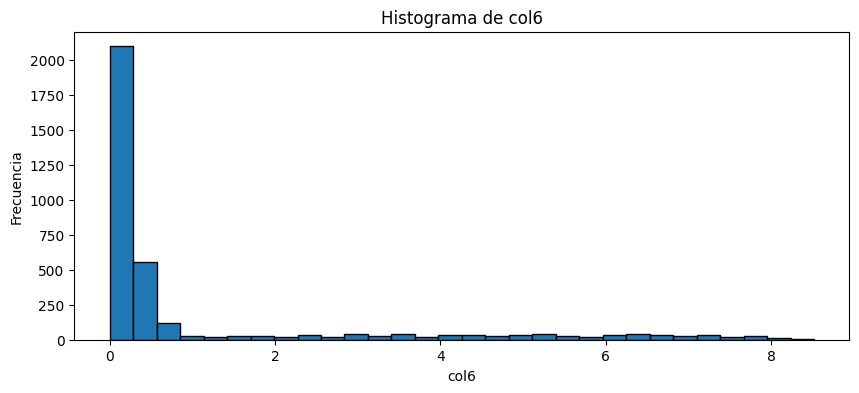

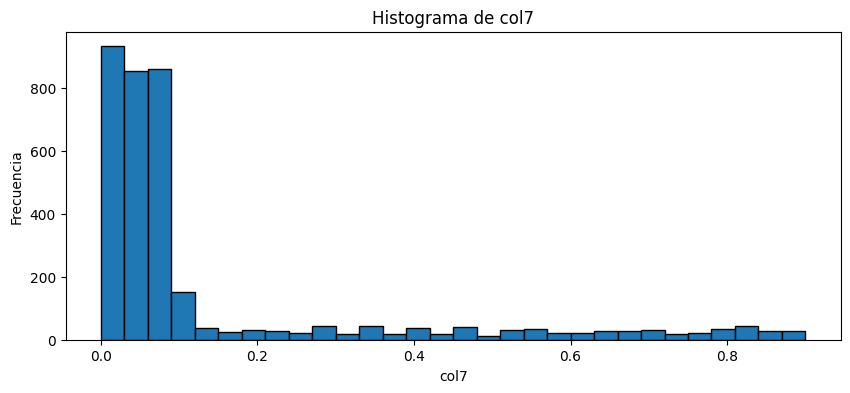

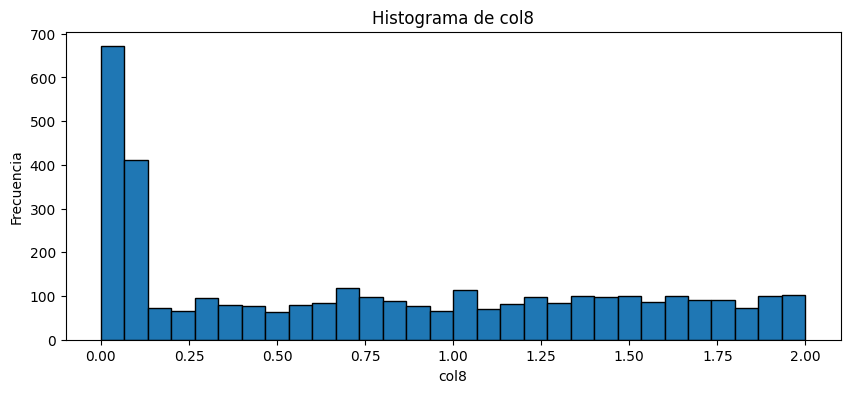

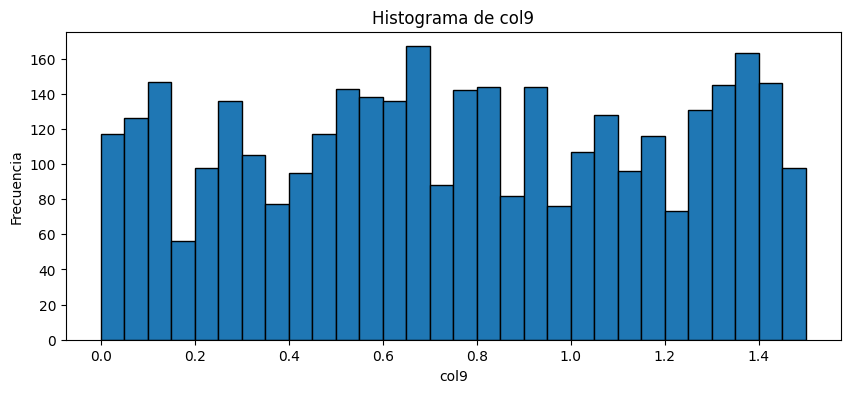

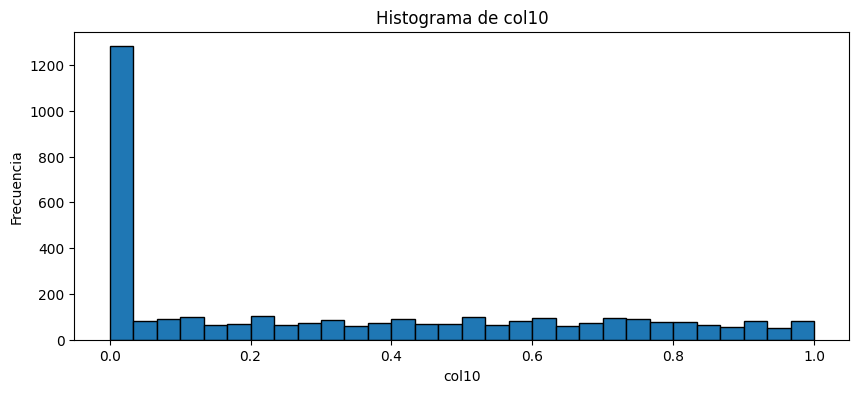

In [29]:
import matplotlib.pyplot as plt


columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']

for column in columns:
    plt.figure(figsize=(10,4))
    plt.hist(train[column], bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


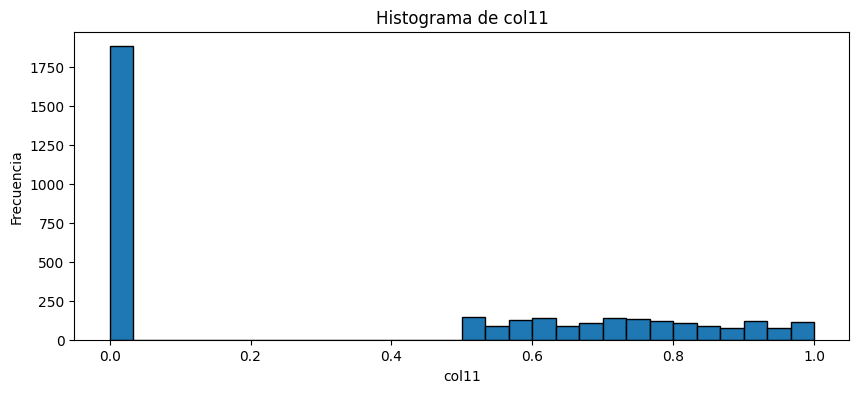

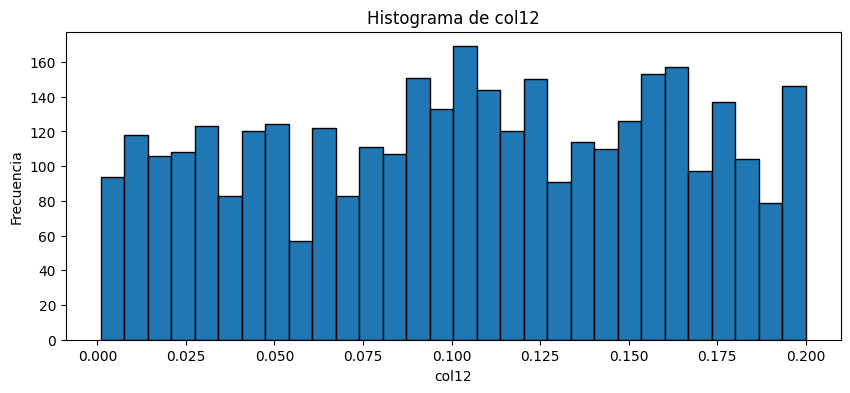

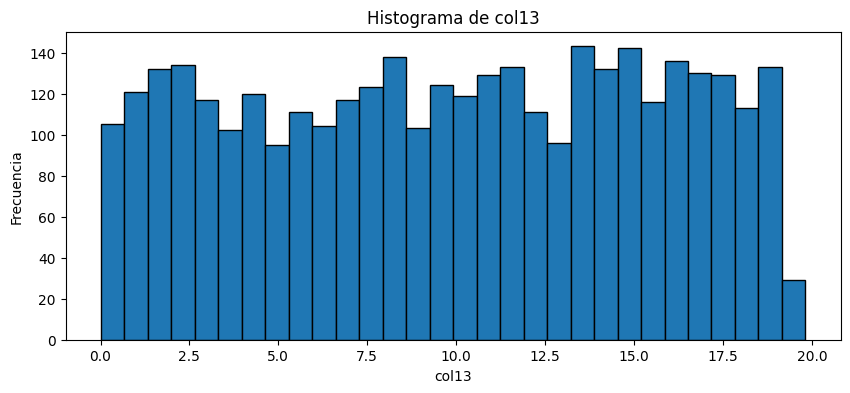

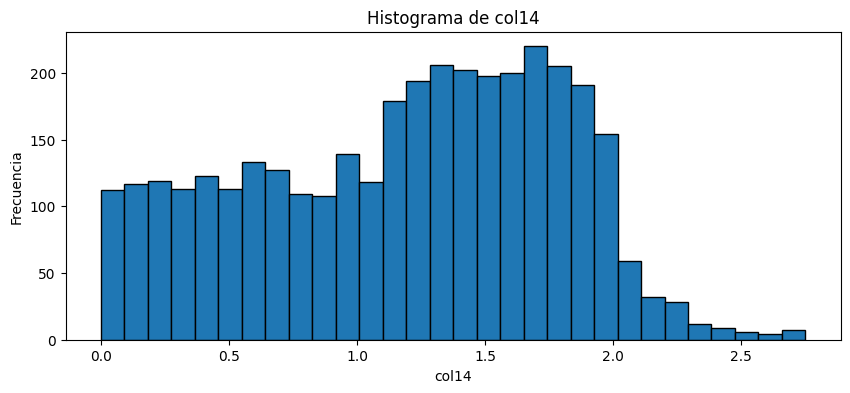

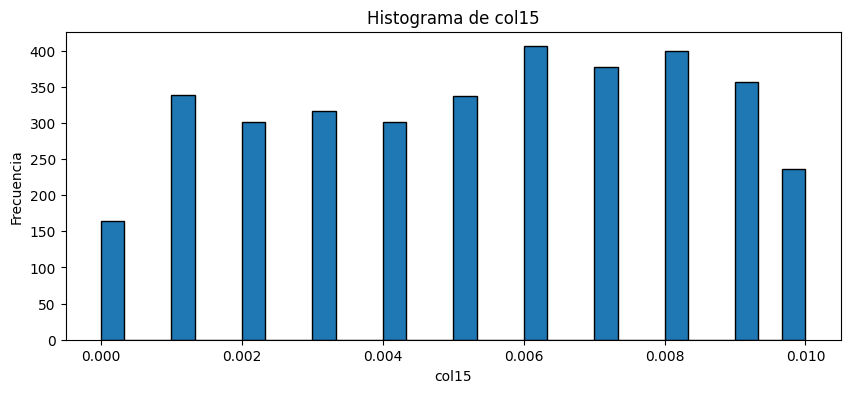

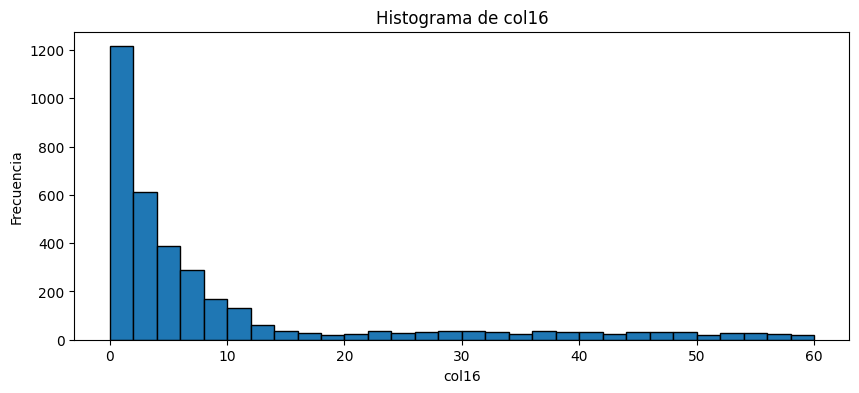

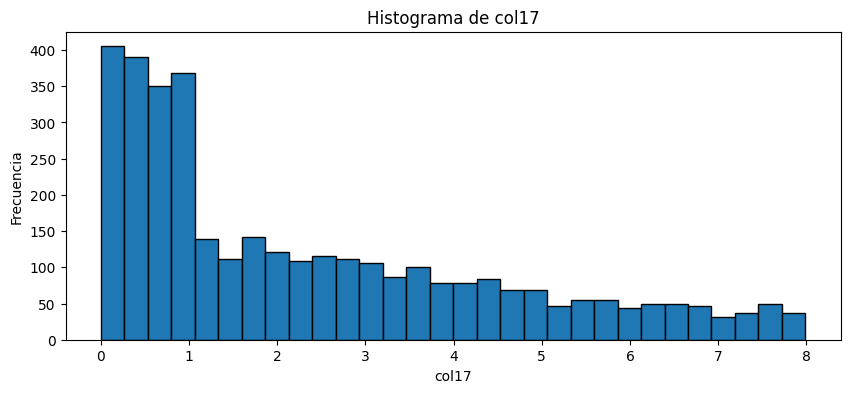

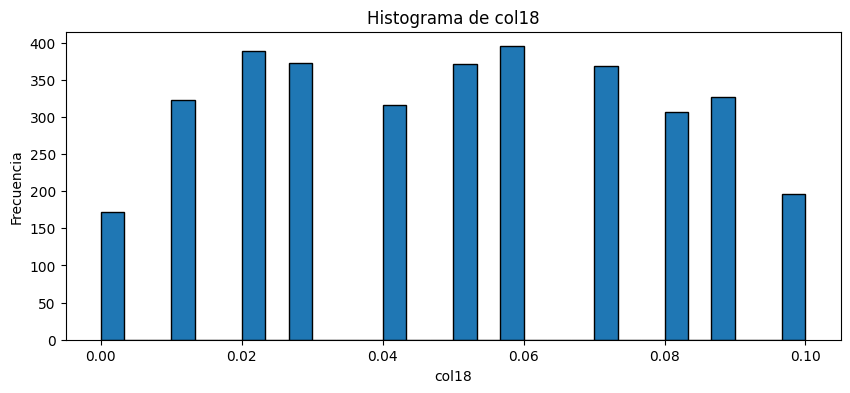

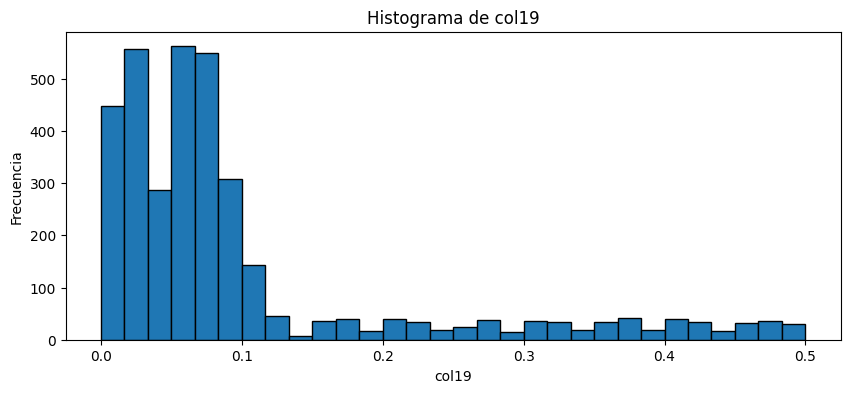

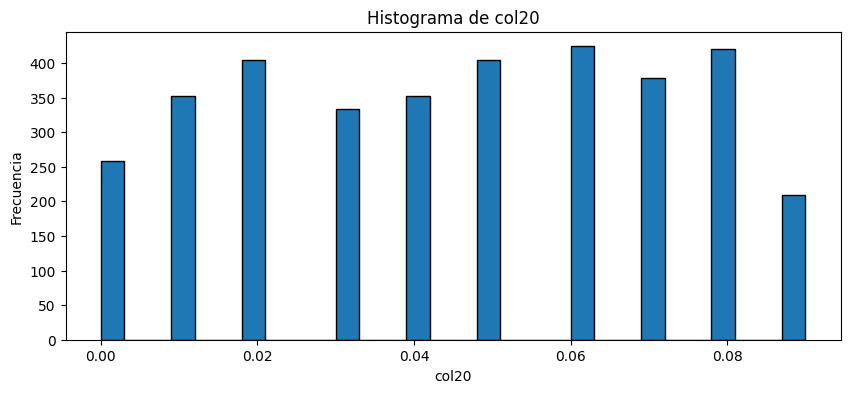

In [30]:
columns = ['col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20']

for column in columns:
    plt.figure(figsize=(10,4))
    plt.hist(train[column], bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

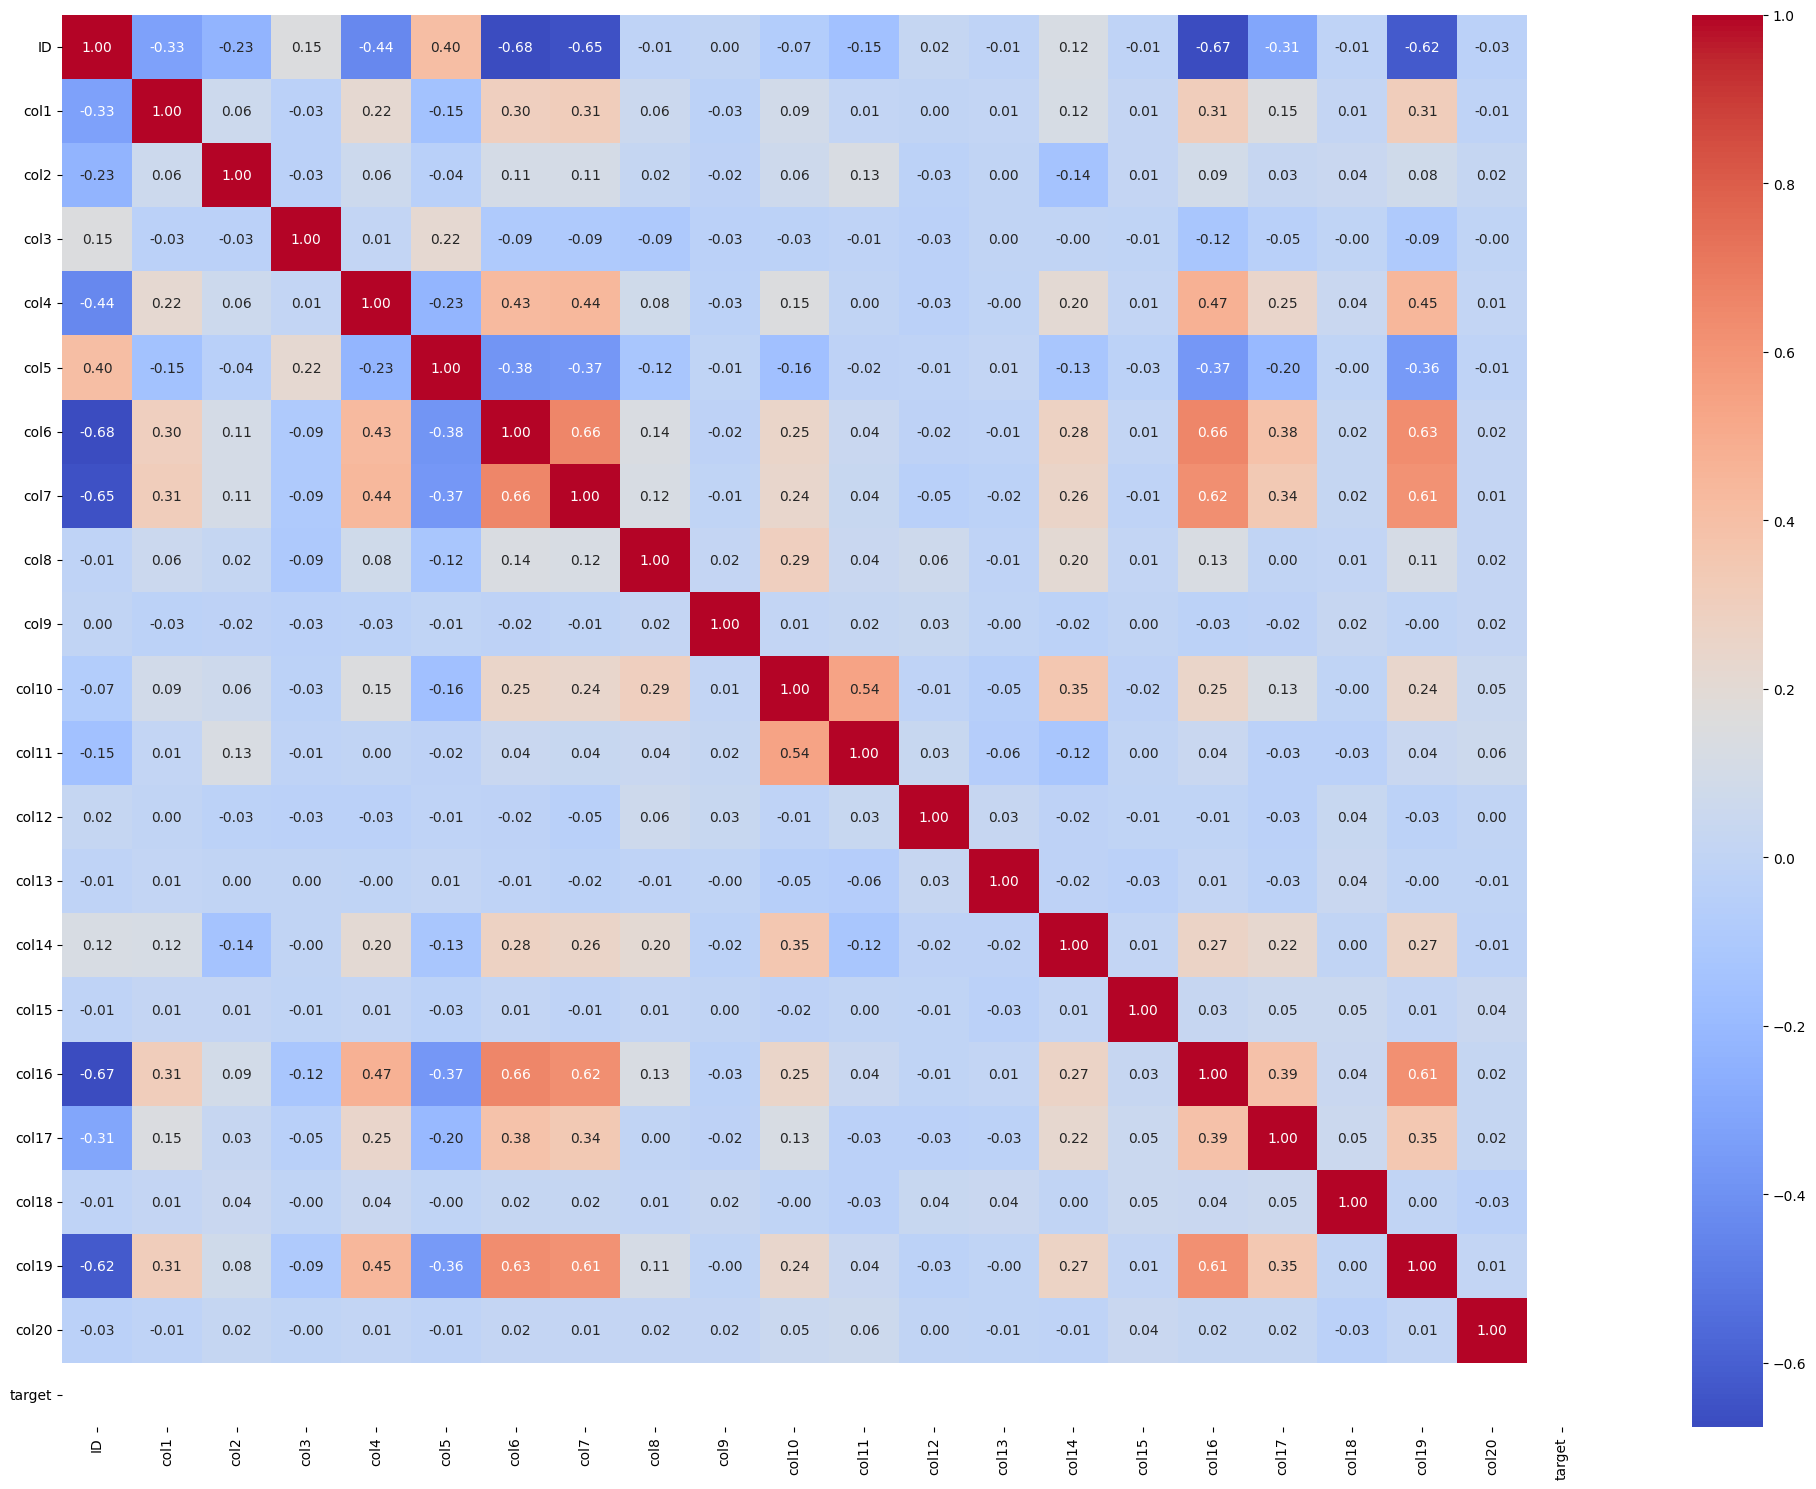

In [31]:
plt.figure(figsize=(20, 15))  
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap='coolwarm') 

plt.xticks(rotation=90)  
plt.yticks(rotation=0)  
plt.tight_layout()  

plt.show()  

In [32]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]


In [68]:
X = train.drop('target', axis=1)
y = train['target']


In [69]:
y.unique()

array([0, 1], dtype=int64)

In [61]:
train.target.unique()

array([0], dtype=int64)

In [70]:
from sklearn.model_selection import train_test_split



In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [73]:
scaler.fit(X_train)

StandardScaler()

In [74]:
scaler_Xtrain = scaler.fit_transform(X_train)

In [75]:
scaler_Xtest = scaler.fit_transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression()


In [55]:
scaler_Xtrain


array([[-1.25084233,  1.34808974,  0.03895724, ...,  0.02587612,
        -0.65235462, -0.8967362 ],
       [-0.91058991, -1.055305  ,  1.51619334, ...,  1.41412996,
         1.04579314,  1.30677054],
       [ 0.82408201, -0.36862079, -0.73022816, ...,  1.0670665 ,
         0.36653404, -1.26398732],
       ...,
       [ 0.28425   , -1.3986471 ,  0.51136156, ..., -1.70944119,
        -0.31272507, -0.8967362 ],
       [ 1.10542769, -0.71196289, -1.13927472, ..., -0.32118734,
        -1.33161372,  0.93951941],
       [ 1.17752252,  1.00474763, -0.037739  , ..., -1.70944119,
         1.38542269, -1.63123844]])

In [58]:
y_train.unique()

array([0], dtype=int64)

In [77]:
model.fit(scaler_Xtrain,y_train)




LogisticRegression()

In [79]:
y_pred = model.predict(scaler_Xtrain)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9417020326111235


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f'Accuracy on training set: {accuracy_train}')
print(f'Accuracy on test set: {accuracy_test}')


Accuracy on training set: 1.0
Accuracy on test set: 0.9669642857142857


In [92]:
X_test = pd.read_csv(r'C:\Users\horta\Desktop\trainpruebatecnica.csv') 


In [93]:
X = train.drop('target', axis=1)
y = train['target']

In [94]:
from sklearn.tree import DecisionTreeClassifier


In [95]:
model = DecisionTreeClassifier()


In [96]:
model.fit(X, y)


DecisionTreeClassifier()

In [100]:
X_test = pd.read_csv(r'C:\Users\horta\Desktop\testpruebatecnica.csv') 

In [103]:
y_pred = model.predict(X_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Informe
En esta sección del informe, se realizará un análisis exploratorio de los datos proporcionados. El objetivo es comprender la estructura de los datos, identificar posibles problemas y explorar las relaciones entre las variables. Se utilizará el conjunto de datos de entrenamiento "trainpruebatecnica.csv" para este análisis.

- carga de datos
El primer paso es cargar el conjunto de datos de entrenamiento utilizando la biblioteca pandas. El conjunto de datos se almacenó en un DataFrame llamado "train".

- Exploración inicial
Para obtener una visión general de los datos, se utilizó el método "head()" para mostrar las primeras filas del DataFrame "train". Esto nos permite ver las columnas y los valores iniciales de los datos.

- Estadísticas descriptivas
A continuación, se utilizó el método "describe()" en el DataFrame "train" para obtener estadísticas descriptivas de las variables. Esto incluye el recuento, la media, la desviación estándar, el mínimo, el máximo y los cuartiles de cada columna. Estos valores nos proporcionan información sobre la distribución y variabilidad de los datos.

- -Valores faltantes
Se aplicó el método "isnull().sum()" en el DataFrame "train" para verificar si hay valores faltantes en las columnas. El resultado mostró que no hay valores faltantes en ninguna de las columnas.

- Correlación con la variable objetivo
Se calculó la matriz de correlación entre todas las variables del DataFrame "train" utilizando el método "corr()". Luego, se extrajo la columna de correlación de la variable objetivo "target" y se ordenó en orden descendente para analizar la correlación de cada variable con la variable objetivo. Sin embargo, se observó que todas las variables tienen valores de correlación faltantes (NaN). Esto puede indicar que hay algún problema en los datos o en el cálculo de la correlación.

- Visualización de histogramas:

- Creamos una lista llamada "columns" que contiene los nombres de las columnas 'col1' a 'col10'.
Utilizamos un bucle "for" para iterar sobre cada columna en la lista "columns".
Para cada columna, creamos una figura con el tamaño (10, 4) utilizando "plt.figure(figsize=(10,4))".
Generamos un histograma utilizando "plt.hist(train[column], bins=30, edgecolor='black')", donde "train[column]" es la columna correspondiente en el DataFrame "train".
Establecemos el título del histograma con "plt.title(f'Histograma de {column}')", donde "column" es el nombre de la columna.
Etiquetamos los ejes x e y con "plt.xlabel(column)" y "plt.ylabel('Frecuencia')", respectivamente.
Mostramos el histograma utilizando "plt.show()".
Visualización de histogramas adicionales:

- Creamos una nueva lista llamada "columns" que contiene los nombres de las columnas 'col11' a 'col20'.
Utilizamos el mismo bucle "for" y los pasos anteriores para generar histogramas para estas columnas adicionales.
Visualización de matriz de correlación:

- Creamos una figura con el tamaño (20, 15) utilizando "plt.figure(figsize=(20, 15))".
Utilizamos la función "heatmap" de seaborn para crear un mapa de calor de la matriz de correlación de "train".
"sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap='coolwarm')" genera el mapa de calor.
Establecemos la rotación de las etiquetas de los ejes x con "plt.xticks(rotation=90)".
Establecemos la rotación de las etiquetas de los ejes y con "plt.yticks(rotation=0)".
Ajustamos el diseño del gráfico con "plt.tight_layout()".
Mostramos el mapa de calor utilizando "plt.show()".
Eliminación de valores atípicos:

- Calculamos los cuartiles Q1, Q3 y el rango intercuartil (IQR) utilizando "Q1 = train.quantile(0.25)", "Q3 = train.quantile(0.75)" y "IQR = Q3 - Q1".
Filtramos el DataFrame "train" para eliminar las filas que contengan valores atípicos utilizando "train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]".
Preparación de datos para el modelo:

- Dividimos el conjunto de datos en características (X) y variable objetivo (y) utilizando "X = train.drop('target', axis=1)" y "y = train['target']".
Importamos la función "train_test_split" de "sklearn.model_selection".
Creamos conjuntos de entrenamiento y prueba utilizando "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)".
Importamos la clase "StandardScaler" de "sklearn.preprocessing".
Creamos una instancia del escalador utilizando "scaler = StandardScaler()".
Ajustamos el escalador en los datos de entrenamiento utilizando "scaler.fit(X_train)".
Transformamos los datos de entrenamiento y prueba utilizando "scaler_Xtrain = scaler.transform(X_train)" y "scaler_Xtest = scaler.transform(X_test)".
Entrenamiento y evaluación del modelo de Regresión Logística:

- Importamos la clase "LogisticRegression" de "sklearn.linear_model" y la función "accuracy_score" de "sklearn.metrics".
Creamos una instancia del modelo de Regresión Logística utilizando "model = LogisticRegression()".
Entrenamos el modelo utilizando "model.fit(scaler_Xtrain, y_train)".
Realizamos predicciones en los datos de entrenamiento utilizando "y_pred = model.predict(scaler_Xtrain)".
Calculamos la precisión del modelo en los datos de entrenamiento utilizando "accuracy = accuracy_score(y_train, y_pred)".
Imprimimos la precisión utilizando "print(f'Accuracy: {accuracy}')".
Entrenamiento y evaluación del modelo de Árbol de Decisión:

- Importamos la clase "DecisionTreeClassifier" de "sklearn.tree".
Creamos una instancia del modelo de Árbol de Decisión utilizando "model = DecisionTreeClassifier()".
Entrenamos el modelo utilizando "model.fit(X_train, y_train)".
Realizamos predicciones en los datos de entrenamiento y prueba utilizando "y_train_pred = model.predict(X_train)" y "y_test_pred = model.predict(X_test)".
- Calculamos la precisión del modelo en los datos de entrenamiento y prueba utilizando "accuracy_train = accuracy_score(y_train, y_train_pred)" y "accuracy_test = accuracy_score(y_test, y_test_pred)".
Imprimimos las precisiones utilizando "print(f'Accuracy on training set: {accuracy_train}')" y "print(f'Accuracy on test set: {accuracy_test}')".
Predicción en datos de prueba:

- Cargamos los datos de prueba utilizando "X_test = pd.read_csv(r'C:\Users\horta\Desktop\testpruebatecnica.csv')".
Realizamos predicciones en los datos de prueba utilizando "y_pred = model.predict(X_test)".
Imprimimos las predicciones utilizando "y_pred".

# Resumen 
En esta prueba, se llevó a cabo un análisis exploratorio de los datos para comprender la estructura y características del conjunto de datos. Se examinaron las estadísticas descriptivas y la matriz de correlación para obtener información sobre las variables y su relación con la variable objetivo.

Se realizaron visualizaciones, como histogramas, para comprender las distribuciones de las variables y detectar posibles valores atípicos. Además, se utilizó un mapa de calor para visualizar la correlación entre las variables.

Se procedió al preprocesamiento de datos, que incluyó la eliminación de valores atípicos utilizando el rango intercuartílico y la normalización de las características mediante el escalado.

Luego, se entrenaron y evaluaron varios modelos de aprendizaje automático, como la Regresión Logística y el Árbol de Decisión. Se dividió el conjunto de datos en conjuntos de entrenamiento y prueba, y se utilizó la precisión como métrica de evaluación.

Finalmente, se utilizó el modelo de Árbol de Decisión con el mejor rendimiento para hacer predicciones en los datos de prueba.

El proceso implicó un análisis detallado de los datos, el preprocesamiento adecuado para mejorar la calidad de los datos y el entrenamiento y evaluación de modelos para seleccionar el más adecuado. Los resultados obtenidos proporcionarán información valiosa para predecir la variable objetivo en datos nuevos o futuros.

Muchas gracias por llegar hasta aquí, espero poder formar parte de su equipo y aportar mi granito de arena para ayudaros a seguir creciendo. 